# 29회 ADP 복원 

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.data.go.kr/data/15094266/fileData.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv
- 데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

### 1-1  계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

In [328]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='euc-kr')
df1

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2008,47100,3646000,46,33,남,미혼,3,미퇴거
1,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
2,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2010,56500,4375000,46,35,남,미혼,3,미퇴거
3,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2011,69900,5408000,46,36,남,미혼,3,미퇴거
4,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2012,69900,5408000,46,37,남,미혼,3,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86899,12882,해지,8,180,지산5단지아파트,3,8.0,86891,14,15,...,2018.0,2017,49500,3055000,60,56,남,기혼,2,미퇴거
86900,12882,해지,8,180,지산5단지아파트,3,8.0,86891,14,15,...,2018.0,2018,49500,3055000,60,57,남,기혼,2,퇴거
86901,12883,유효,2,36,지산5단지아파트,3,8.0,86891,14,15,...,NaN,2018,45000,2365000,52,49,남,미혼,1,미퇴거
86902,12883,유효,2,36,지산5단지아파트,3,8.0,86891,14,15,...,NaN,2019,45000,2365000,52,50,남,미혼,1,미퇴거


In [329]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86904 entries, 0 to 86903
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순번       86904 non-null  int64  
 1   계약구분     86396 non-null  object 
 2   재계약횟수    86904 non-null  int64  
 3   거주개월     86904 non-null  int64  
 4   아파트 이름   86904 non-null  object 
 5   아파트 ID   86904 non-null  int64  
 6   아파트 평점   85679 non-null  float64
 7   호실고유번호   86904 non-null  int64  
 8   층        86904 non-null  int64  
 9   평형대      86904 non-null  int64  
 10  계약자고유번호  86904 non-null  int64  
 11  계약서고유번호  86904 non-null  int64  
 12  입주연도     86904 non-null  int64  
 13  퇴거연도     25762 non-null  float64
 14  거주연도     86904 non-null  int64  
 15  월세(원)    86904 non-null  int64  
 16  보증금(원)   86904 non-null  int64  
 17  대표나이     86904 non-null  int64  
 18  나이       86904 non-null  int64  
 19  성별       86904 non-null  object 
 20  결혼여부     86904 non-null  object 
 21  거주자 수    869

In [330]:
df1.describe()

,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,계약서고유번호,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
count,86904.000000,86904.000000,86904.000000,86904.000000,85679.000000,86904.000000,86904.000000,86904.000000,86904.000000,86904.000000,86904.000000,25762.000000,86904.000000,86904.000000,8.690400e+04,86904.000000,86904.000000,86904.000000
mean,6491.167507,7.381709,174.413318,1.830295,6.393294,43444.813633,7.881202,13.289388,43447.639257,43447.678220,2005.240127,2015.992237,2013.990150,57680.561309,3.384638e+06,66.673893,59.664043,1.652536
std,3745.003081,2.759457,64.811846,0.874843,1.284757,25088.009930,4.267868,2.385220,25087.616670,25087.498178,4.834619,3.144036,3.729721,30588.513118,2.381399e+06,12.949539,13.275218,0.926899
min,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1994.000000,2008.000000,2008.000000,31300.000000,1.520000e+06,21.000000,20.000000,1.000000
25%,3241.000000,5.000000,126.000000,1.000000,5.000000,21724.000000,4.000000,12.000000,21721.000000,21724.000000,2002.000000,2014.000000,2011.000000,40300.000000,1.954000e+06,59.000000,51.000000,1.000000
50%,6547.000000,8.000000,197.000000,2.000000,7.000000,43425.000000,8.000000,12.000000,43446.000000,43451.000000,2003.000000,2017.000000,2014.000000,43600.000000,2.144000e+06,66.000000,59.000000,1.000000
75%,9711.250000,10.000000,222.000000,2.000000,7.000000,65170.000000,12.000000,15.000000,65175.000000,65178.000000,2008.000000,2019.000000,2017.000000,62900.000000,3.778000e+06,76.000000,69.000000,2.000000
max,12883.000000,12.000000,323.000000,5.000000,10.000000,86891.000000,15.000000,19.000000,86892.000000,86904.000000,2020.000000,2020.000000,2020.000000,311080.000000,2.078400e+07,121.000000,120.000000,10.000000


### 1-2 결측치를 처리하라

In [331]:
df1.isna().sum()

순번             0
계약구분         508
재계약횟수          0
거주개월           0
아파트 이름         0
아파트 ID         0
아파트 평점      1225
호실고유번호         0
층              0
평형대            0
계약자고유번호        0
계약서고유번호        0
입주연도           0
퇴거연도       61142
거주연도           0
월세(원)          0
보증금(원)         0
대표나이           0
나이             0
성별             0
결혼여부           0
거주자 수          0
퇴거여부           0
dtype: int64

In [332]:
## 퇴거연도 결측은 입주중이라고 보고 2023 년으로 가정함
## 아파트 평점 : 평균 대체
## 계약구분 : null 값 삭제

df1 = df1[df1['계약구분'].notna()]
df1['아파트 평점'].fillna(df1['아파트 평점'].mean(), inplace=True)
df1['퇴거연도'].fillna(2023, inplace=True)

## 분석에 사용되는 데이터셋 재정의
df1_v1 = df1[['계약구분','재계약횟수','거주개월','아파트 평점','층','평형대','월세(원)','보증금(원)','대표나이','나이','성별','결혼여부','거주자 수','퇴거여부']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### 1-3 이상치를 처리하라

In [333]:
class font_setting():
    def __init__(self):
        self.font_url = "https://github.com/google/fonts/blob/main/ofl/nanumgothic/NanumGothic-Regular.ttf?raw=true"
        self.path = "./NanumGothic-Regular.ttf"
        
    def get_font(self):
        import requests
        from matplotlib import font_manager, rc
        import matplotlib.pyplot as plt
        
        res = requests.get(self.font_url)
        
        with open(self.path, "wb") as font_file:
            font_file.write(res.content)
        
        font_manager.fontManager.ttflist += font_manager.createFontList([self.path])
        rc('font', family='NanumGothic')
        plt.rcParams["font.family"] = 'NanumGothic'
    
    def delete_font(self):
        import os
        os.remove(self.path)

font_set = font_setting()
font_set.get_font()

IndexError: index 2 is out of bounds for axis 0 with size 2

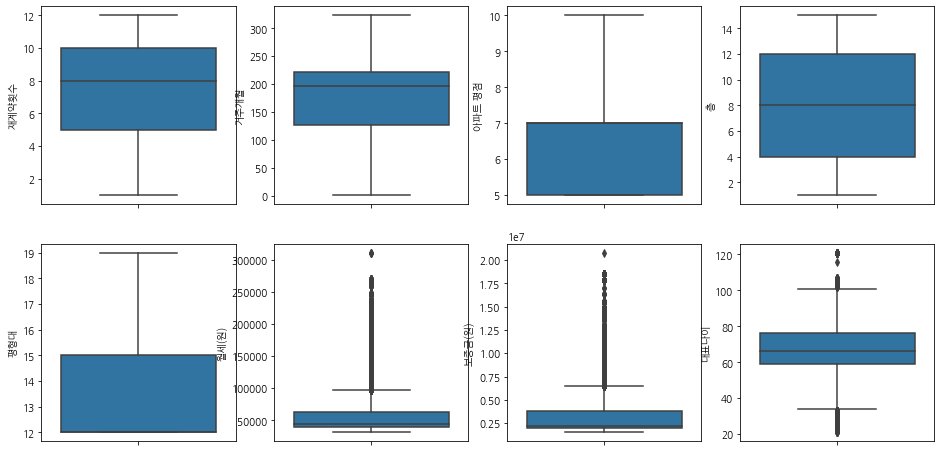

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.boxplot(df1_v2['F'])
# plt.title('소비자별 구매빈도')

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features = ['재계약횟수','거주개월','아파트 평점','층','평형대','월세(원)','보증금(원)','대표나이','나이'] # lm_features = df.columns[:-1]
for i, feature in enumerate(cat_features):
    row = i // 4
    col = i % 4
    sns.boxplot(y=feature, data=df1_v1, ax=axs[row][col])
plt.tight_layout()
plt.show()

In [ ]:
## 이상치로 판단되는 케이스 없어서 처리 안함. 결측치값은 위에서 대체함

def outliers_iqr(dt, col):
    q1, q3 = np.percentile(dt[col], [25,75])
    iqr = q3-q1
    lower_whis = q1 - (iqr*1.5)
    upper_whis = q3 + (iqr*1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

### 2-1 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 '높음', 작으면 '낮음' 으로 재계약 횟수 이분 변수를 구성하시오.

In [341]:
df1_v2 = df1_v1.copy()
median = df1_v1['재계약횟수'].median()
df1_v1['재계약중앙값기준'] = df1_v1['재계약횟수'].map(lambda x: '높음' if x >= median else '낮음')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 2-2 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

고유값: [5.84883803e+08 1.71891136e+06 1.54025267e+04 4.43685533e+03
 1.04065857e+03 6.32873426e+02 5.02436722e+02]
분산설명력: [9.99991362e-01 8.63702194e-06 6.93491271e-10 5.75450001e-11
 3.16572795e-12 1.17082174e-12 7.37937883e-13]


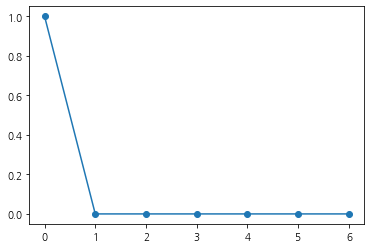

In [335]:
## 분석용 데이터셋 생성(df1_v2)
df1_v2['median_div'] = df1_v2['재계약횟수'].map(lambda x: 1 if x >= median else 0)
df1_v2.drop('재계약횟수', axis=1, inplace=True)


## 범주형 one-hot encoding 
df1_v2 = pd.get_dummies(df1_v2)


from sklearn.model_selection import train_test_split
target = df1_v2['median_div']
features = df1_v2.drop('median_div', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0, stratify=target)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(X_train, y_train)
print('고유값:', pca.singular_values_)
print('분산설명력:', pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

## 차원축소 필요 없음, 현재의 변수 자체로 타겟 설명 가능

### 3-1 2번에서 진행한 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

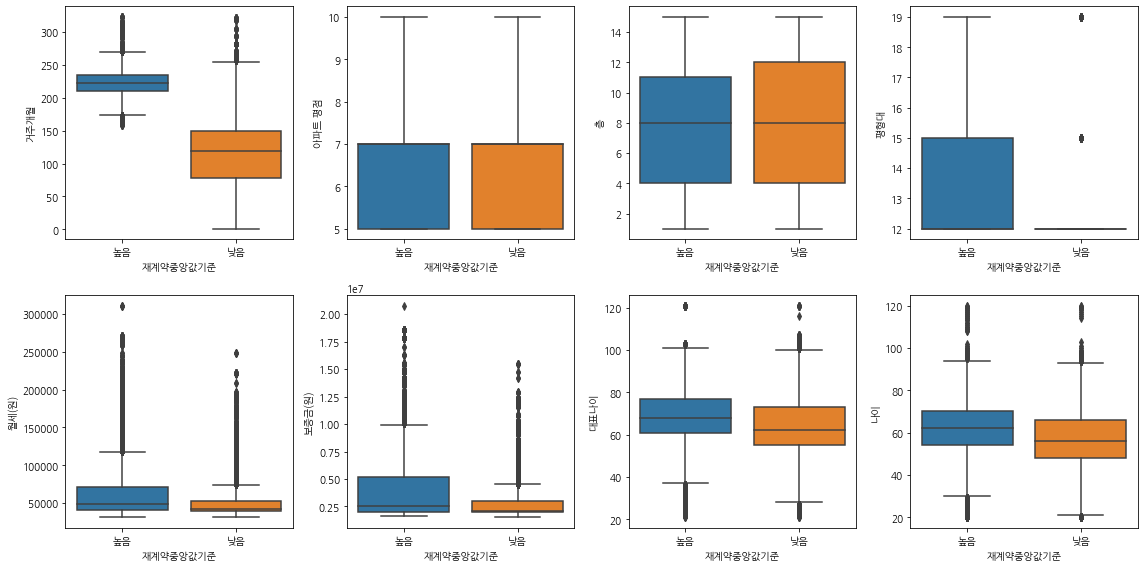

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features = ['거주개월','아파트 평점','층','평형대','월세(원)','보증금(원)','대표나이','나이'] # lm_features = df.columns[:-1]
for i, feature in enumerate(cat_features):
    row = i // 4
    col = i % 4
    sns.boxplot(x='재계약중앙값기준', y=feature, data=df1_v1, ax=axs[row][col])
plt.tight_layout()
plt.show()

### 3-2. 재계약횟수 변수를 종속변수로 하는 회귀 분석 모델을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 재계약횟수 이분변수를 종속변수로 하는 분류 분석을 두가지 이상의 방법론을 통해 수행하고 최종 모델을 결정한 후 그 이유를 작성하시오 

In [344]:
## 회귀 모델 두가지
import time
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmsle(y, pred):
    log_y =np.log1p(y)
    log_pred = np.log1p(pred)
    sqaured_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(sqaured_error))
    return rmsle




start = time.time()
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)
lr_rmsle_val = rmsle(y_test,lr_pred)
lr_rmse_val = np.sqrt(mean_squared_error(y_test, lr_pred))
print('회귀분석 RMSE : ',lr_rmse_val)
print('회귀분석 time :', time.time()-start)

      
start = time.time()
xgb_reg = XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_rmsle_val = rmsle(y_test,xgb_pred)
xgb_rmse_val = np.sqrt(mean_squared_error(y_test, xgb_pred))

print('XGBoost RMSE : ',xgb_rmse_val)
print('XGBoost time :', time.time()-start)


      
      
## 분류 모델 두가지
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


start = time.time()
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision tree 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('time :', time.time()-start)

start = time.time()
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('time :', time.time()-start)

start = time.time()
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('time :', time.time()-start)

## 1. 회귀모델 best : 실제 현업에서 사용 시, 런타임시간 짧고 & RMSE 낮은 선형회귀분석 ㅏㅅ용
## 2. 분류모델 best : 랜덤포레스트 사용

회귀분석 RMSE :  0.2724020438567402
회귀분석 time : 0.04235339164733887
XGBoost RMSE :  0.08702148252438494
XGBoost time : 1.9086079597473145
Decision tree 정확도: 0.9966
time : 0.26132702827453613
RandomForest 정확도: 0.9970
time : 4.27584433555603
Logistic 정확도: 0.8112
time : 0.2541313171386719


### 3-3 최종 채택한 모델에서 각각 변수 중요도를 확인하고 각 변수의 차이점을 설명하시오

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


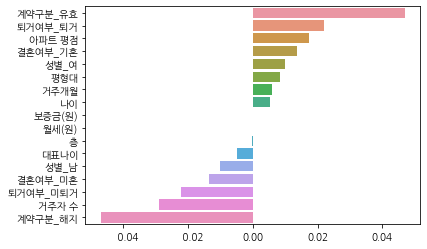

In [345]:
## 1. 회귀모델 변수 중요도
## 회귀모델의 변수 중요도는 stepwise 사용하여 변수를 하나씩 빼고 더함으로써 AIC가 낮아지는 방향으롤 변수의 중요도를 탐색 할 수 있다

coef = pd.Series(lr_reg.coef_, index=features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

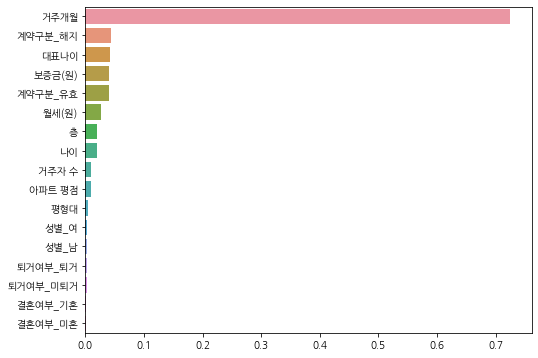

In [346]:
## 2. 분류모델
importance_values = rf_clf.feature_importances_
importances = pd.Series(importance_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
sns.barplot(x=top20, y=top20.index)
plt.show()

In [ ]:
## 회귀모델로 변수중요도 판단 불가함. 
## 따라서 분류모델 기준 변수 중요도에서 높은순위를 차지하는 거주개월, 계약구분-해지 여부, 대표나이, 보증금 등이 재계약횟수에 영향을 미친다고 볼 수 있다

### 3-4 해당 데이터 분석결과로 얻을 수 있는 점 제시

In [ ]:
## 재계약 진행 시 거주개월, 계약구분-해지 여부, 대표나이, 보증금액 등에 따라 재계약 진행율이 높은지 낮은지를 예측할 수 있으므로
## 임대인은 임차인의 부동산 재계약 여부를 사전에 탐지하여 재계약 성사율이 높다고 판단될 경우, 보증금 증액 검토를 통해 이익 창출 고려할 수 있고,
## 재계약 성사율이 낮다고 판단될 경우, 매물을 빨리 내놓음으로써 리스크를 예방할 수 있음

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018 데이터를 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv
- 데이터 설명 : 

A 야구구단의 시합 결과중 일부를 나타낸다.    
각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다.     
각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 '수치 의미' 열을 통해 확인 할 수 있다.


<img src="https://github.com/Datamanim/datarepo/blob/main/adp/29/p1_img.png?raw=true" width="500" height="600">

In [ ]:
# 1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지

# df2['a1_1']!=5 | df2['a1_1'] !=7 | df2['a1_1'] !=8 | df2['a1_1'] !=7 

In [392]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url2 = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv'
encoded_url2 = urllib.parse.quote(url2, safe=':/')

response = urllib.request.urlopen(encoded_url2, context=context)
df2 = pd.read_csv(response, encoding='utf-8')
df2

,game_id,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,201900016,5,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
1,201900023,6,4,5,5,2,5,1,1,6,...,7,3,0,0,1,0,1,3,1,0
2,201900103,5,6,5,5,1,9,5,4,6,...,6,0,0,1,1,4,1,2,0,1
3,201900112,5,7,6,1,5,5,1,5,1,...,5,0,3,0,0,0,0,1,0,0
4,201900131,5,1,2,5,2,5,7,2,6,...,6,0,2,4,1,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,201902346,7,5,7,4,1,9,5,7,7,...,1,0,1,2,0,0,0,0,0,1
196,201902365,2,5,1,1,7,5,5,7,5,...,9,0,0,0,0,1,0,0,0,2
197,201902373,,7,5,6,5,9,7,5,1,...,5,0,0,0,0,0,1,0,0,0
198,201902392,6,5,5,1,1,5,6,5,5,...,7,0,0,2,1,0,0,0,2,1


### 4-1 각 회차별로 1번 타자의 출루 (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)     

조건1 : 득점여부를 범주형 종속변수로 한다. (1점이상 득점 :1, 무득점 :0)     
조건2 : 각 회차 2번 타자의 데이터는 원핫 인코딩한다.    
조건3 : 학습에 적절하지 않은 데이터는 제외한다.    

In [373]:
df2 = df2[df2['a1_1'] != ' ']
df2 = df2[df2['a2_1'] != ' ']
df2 = df2[df2['a4_1'] != ' ']
df2 = df2[df2['a7_1'] != ' ']

df2 = df2[df2['a2_1'] !=' :']
df2 = df2[df2['a4_1'] !='&']
df2 = df2[df2['a7_1'] !='"']

df2['a1_1'] = df2['a1_1'].astype('int')
df2['a2_1'] = df2['a2_1'].astype('int')
df2['a4_1'] = df2['a4_1'].astype('int')
df2['a7_1'] = df2['a7_1'].astype('int')

df2['a1_2'] = df2['a1_2'].astype('object')
df2['a2_2'] = df2['a2_2'].astype('object')
df2['a3_2'] = df2['a3_2'].astype('object')
df2['a4_2'] = df2['a4_2'].astype('object')
df2['a5_2'] = df2['a5_2'].astype('object')
df2['a6_2'] = df2['a6_2'].astype('object')
df2['a7_2'] = df2['a7_2'].astype('object')
df2['a8_2'] = df2['a8_2'].astype('object')
df2['a9_2'] = df2['a9_2'].astype('object')

In [378]:
## 조건3
# 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외


a1_1 = pd.DataFrame({'타자': df2['a1_1'],'game_id': df2['game_id']})
a1_2 = pd.DataFrame({'타자': df2['a1_2'],'game_id': df2['game_id']})
a2_1 = pd.DataFrame({'타자': df2['a2_1'],'game_id': df2['game_id']})
a2_2 = pd.DataFrame({'타자': df2['a2_2'],'game_id': df2['game_id']})
a3_1 = pd.DataFrame({'타자': df2['a3_1'],'game_id': df2['game_id']})
a3_2 = pd.DataFrame({'타자': df2['a3_2'],'game_id': df2['game_id']})
a4_1 = pd.DataFrame({'타자': df2['a4_1'],'game_id': df2['game_id']})
a4_2 = pd.DataFrame({'타자': df2['a4_2'],'game_id': df2['game_id']})
a5_1 = pd.DataFrame({'타자': df2['a5_1'],'game_id': df2['game_id']})
a5_2 = pd.DataFrame({'타자': df2['a5_2'],'game_id': df2['game_id']})
a6_1 = pd.DataFrame({'타자': df2['a6_1'],'game_id': df2['game_id']})
a6_2 = pd.DataFrame({'타자': df2['a6_2'],'game_id': df2['game_id']})
a7_1 = pd.DataFrame({'타자': df2['a7_1'],'game_id': df2['game_id']})
a7_2 = pd.DataFrame({'타자': df2['a7_2'],'game_id': df2['game_id']})
a8_1 = pd.DataFrame({'타자': df2['a8_1'],'game_id': df2['game_id']})
a8_2 = pd.DataFrame({'타자': df2['a8_2'],'game_id': df2['game_id']})
a9_1 = pd.DataFrame({'타자': df2['a9_1'],'game_id': df2['game_id']})
a9_2 = pd.DataFrame({'타자': df2['a9_2'],'game_id': df2['game_id']})


df2_final = pd.concat([a1_1,a2_1, a3_1, a3_2, a4_1, a4_2, a5_1,a5_2,a6_1,a7_1,a8_1,a8_2,a9_1,a9_2], ignore_index=True)
id_div = df2_final[df2_final['타자']!=4]['game_id']
df2 = df2[df2['game_id'].isin(id_div)]

In [380]:
## 조건1
df2['득점_sum'] = df2['b1'] + df2['b2'] + df2['b3'] + df2['b4']+df2['b5']+df2['b6']+df2['b7']+df2['b8']+df2['b9']
df2['득점여부'] = df2['득점_sum'].map(lambda x: '1' if x >= 1 else '0')

In [381]:
## 조건2
df2 = pd.get_dummies(df2)

### 4-2 4-1 데이터에 대해 Logistic Regression을 적용하고 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 하라

In [382]:
## 분석용 데이터셋 구성(2번타자 희생번트 여부 (target) 에 따른 득점?)
df2_v1 = df2.copy()

In [383]:
a1 = pd.DataFrame({'희생번트여부': df2_v1['a1_2_9'],'score': df2_v1['득점_sum'],'1번타자': df2_v1['a1_1']})
a2 = pd.DataFrame({'희생번트여부': df2_v1['a2_2_9'],'score': df2_v1['득점_sum'],'1번타자': df2_v1['a2_1']})
a3 = pd.DataFrame({'희생번트여부': df2_v1['a3_2_9'],'score': df2_v1['득점_sum'],'1번타자': df2_v1['a3_1']})
a4 = pd.DataFrame({'희생번트여부': df2_v1['a4_2_9'],'score': df2_v1['득점_sum'],'1번타자': df2_v1['a4_1']})
a5 = pd.DataFrame({'희생번트여부': df2_v1['a5_2_9'],'score': df2_v1['득점_sum'],'1번타자': df2_v1['a5_1']})
a6 = pd.DataFrame({'희생번트여부': df2_v1['a6_2_9'],'score': df2_v1['득점_sum'],'1번타자': df2_v1['a6_1']})
a7 = pd.DataFrame({'희생번트여부': df2_v1['a7_2_9'],'score': df2_v1['득점_sum'],'1번타자': df2_v1['a7_1']})
a8 = pd.DataFrame({'희생번트여부': df2_v1['a8_2_9'],'score': df2_v1['득점_sum'],'1번타자': df2_v1['a8_1']})
a9 = pd.DataFrame({'희생번트여부': df2_v1['a9_2_9'],'score': df2_v1['득점_sum'],'1번타자': df2_v1['a9_1']})

df2_v2 = pd.concat([a1,a2, a3,a4,a5,a6,a7,a8,a9], ignore_index=True)

In [384]:
df2_v2

,희생번트여부,score,1번타자
0,0,6,5
1,0,9,6
2,0,10,5
3,0,4,5
4,0,12,5
...,...,...,...
1615,0,4,7
1616,0,4,6
1617,1,3,1
1618,0,6,4


In [385]:
from sklearn.model_selection import train_test_split
target = df2_v2['희생번트여부']
features = df2_v2[['score','1번타자']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0, stratify=target)

from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmsle(y, pred):
    log_y =np.log1p(y)
    log_pred = np.log1p(pred)
    sqaured_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(sqaured_error))
    return rmsle

lr_rmsle_val = rmsle(y_test,lr_pred)
lr_rmse_val = np.sqrt(mean_squared_error(y_test, lr_pred))

print('회귀분석 RMSE : ',lr_rmse_val)

회귀분석 RMSE :  0.20487217242552552


### 4-3 SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하라

In [386]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority', random_state =0)
x_sm, y_sm = smote_sample.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피쳐/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피쳐/레이블 데이터 세트:', x_sm.shape, y_sm.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_sm).value_counts())

SMOTE 적용 전 학습용 피쳐/레이블 데이터 세트: (1134, 2) (1134,)
SMOTE 적용 후 학습용 피쳐/레이블 데이터 세트: (2162, 2) (2162,)
SMOTE 적용 전 레이블 값 분포: 
 0    1081
1      53
Name: 희생번트여부, dtype: int64
SMOTE 적용 전 레이블 값 분포: 
 0    1081
1    1081
Name: 희생번트여부, dtype: int64


### 4-4 4-3에서 변환한 데이터를 기준으로 Logistic Regression을 적용하고 결과를 분석하라

In [387]:
lr_reg = LinearRegression()
lr_reg.fit(x_sm, y_sm)
lr_pred = lr_reg.predict(X_test)

lr_rmsle_val = rmsle(y_test,lr_pred)
lr_rmse_val = np.sqrt(mean_squared_error(y_test, lr_pred))

print('회귀분석 RMSE : ',lr_rmse_val)

## SMOTE로 오버샘플링한 결과의 RMSE 가 더 높게 나옴 ???

회귀분석 RMSE :  0.41412577387496685


### 4-5 4-3에서 변환한 데이터를 기준으로 XGBoost 적용하고 결과를 분석하라

In [388]:
xgb_reg = XGBRegressor(n_estimators=100)

xgb_reg.fit(x_sm, y_sm)
xgb_pred = xgb_reg.predict(X_test)

xgb_rmsle_val = rmsle(y_test,xgb_pred)
xgb_rmse_val = np.sqrt(mean_squared_error(y_test, xgb_pred))

print('XGBoost RMSE : ',xgb_rmse_val)

## 회귀분석보다는 XGBoost의 RSME가 더 낮게 나옴

XGBoost RMSE :  0.3824728


# 통계 (40점)

### 5. TV 패널을 생산하는 공장에서 제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오. (소수점 다섯 째 자리에서 반올림)

In [172]:
from scipy.stats import binom
round(binom.pmf(3,25, 0.03),5)

0.03177

### 6. A, B 두 공장에서 생산되는 제품 중에서 양품일 확률은 15,000개 중에서 11,800개가 양품, 21,000개 중에서 16,400개가 양품이다. 두 공장의 양품 확률이 같은지를 검정하라

#### 6-1 연구가설과 귀무가설을 세워라

In [ ]:
H0 : 양품확률이 같다
H1 : 양품확률이 다르다

#### 6-2 검정 통계량을 구하고 10% 유의수준에서 검정하여라

In [175]:
# from scipy.stats import t, ttest_ind
# # 확률 차이 검정? : 독립성검정? 
# a = 11800/15000
# b = 16400/21000
# alpha = 0.01

# stats.ttest_ind(a,b)

Ttest_indResult(statistic=nan, pvalue=nan)

In [179]:
import numpy as np
from scipy.stats import chi2_contingency

data = np.array([[11800, 2200], [16400, 4600]])

chi2, p, dof, ef = chi2_contingency(data)

print("카이제곱 값:", chi2)
print("P-값:", p)
print("자유도:", dof)
print("기대값:", ef)

## 유의수준 10% 에서 귀무가설 기각. 즉 A, B 공장 양품확률에 차이가 존재한다

카이제곱 값: 205.243723708455
P-값: 1.4983248216027847e-46
자유도: 1
기대값: [[11280.  2720.]
 [16920.  4080.]]


## 7. 아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도 이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

dataurl : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv

In [180]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url3 = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv'
encoded_url3 = urllib.parse.quote(url3, safe=':/')

response3 = urllib.request.urlopen(encoded_url3, context=context)
df3 = pd.read_csv(response3, encoding='utf-8')
df3

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693
5,B,14.297589
6,B,19.737638
7,B,17.302304
8,B,13.591577
9,B,16.627680


### 7-1. 각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.

#### 7-1 연구가설과 귀무가설을 세워라

In [ ]:
H0 : 차종별 범퍼 파손 차이 없다
H1 : Not H0

#### 7-2 검정 통계량을 구하여라

In [189]:
a = df3[df3['name']=='A']['ratio']
b = df3[df3['name']=='B']['ratio']
c = df3[df3['name']=='C']['ratio']
d = df3[df3['name']=='D']['ratio']

statistic, p_value = stats.f_oneway(a,b,c,d)

In [190]:
print("검정통계량 값:", statistic)
print("P-값:", p_value)

검정통계량 값: 24.97695307518529
P-값: 2.8174779556216382e-06


#### 7-3 귀무가설을 기각하는가? 그리고 그 이유를 설명하여라. 만약 귀무가설을 기각하지 못한다면 다중비교(사후비교)를 시행하여라

In [194]:
## 유의확률이 유의수준보다 작으므로 유의수준 5% 기준으로 귀무가설 기각
import scipy.stats
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(df3['ratio'], df3['name'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
A,B,-4.244,0.0028,0.0169,True
A,C,4.7671,0.0014,0.0085,True
A,D,0.7344,0.4837,1.0,False
B,C,7.6098,0.0001,0.0004,True
B,D,4.6215,0.0017,0.0102,True
C,D,-3.6756,0.0063,0.0376,True


### 8. L1,L2,L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며 각각 2.1% , 1.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오. (소수점 둘째자리에서 반올림)

In [348]:
data = pd.DataFrame({'양성(실제)':[370,10],'음성(실제)':[10,690]},index = ['양성(예측)','음성(예측)'])
data

,양성(실제),음성(실제)
양성(예측),370,10
음성(예측),10,690


In [352]:
## 베이지안??

data = pd.DataFrame({'l1':[13,2.1],'l2':[37,1.1], 'l3':[50,303]},index = ['생산율','불량률'])

# P(A|B) = (P(B|A) * P(A)) / P(B)

# P_A : L1 생산되었을 확률 
# p_B : 불량제품확률
# P(B|A) : 2.1

P_A = 13*0.1
P_B_given_A = 2.1*0.1
P_B = (2.1+1.1+3.3)*0.1
P_A_given_B = (P_B_given_A * P_A) / P_B
print(round(P_A_given_B,2))

0.42
